# Visualising spatial data with matplotlib and cartopy

## Import modules, open and select the data
As always, import all modules required. While it is possible to natively visualize maps with matplotlib's
```contourf()``` function, matplotlib is not aware of geographical projections. Fortunately, we can make use of
the ```cartopy``` module which was designed for this purpose and works together with matplotlib.


In [1]:
import matplotlib.cm
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

plt.ioff()

In this example we want to visualize GLEAM's surface soil moisture on a certain day in summer 2020.
Read in the netCDF file and select the data for the desired time step.

In [2]:
gleam = xr.open_dataset("data/gleam_europe_monmean_reduced.nc")
sm = gleam["surface_soil_moisture"]
sm_timestep = sm.sel(time="2020-08-16")
sm_timestep

<xarray.DataArray 'surface_soil_moisture' (time: 1, lat: 100, lon: 254)>
array([[[ nan,  nan, ..., 0.34, 0.34],
        [ nan,  nan, ..., 0.35, 0.34],
        ...,
        [ nan,  nan, ..., 0.12, 0.11],
        [ nan,  nan, ..., 0.11, 0.07]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2020-08-16
  * lon      (lon) float32 -11.38 -11.12 -10.88 -10.62 ... 51.38 51.62 51.88
  * lat      (lat) float32 59.88 59.62 59.38 59.12 ... 35.88 35.62 35.38 35.12
Attributes:
    long_name:  Surface soil moisture
    units:      m3 m-3
    comment:    Soil moisture in the top 0 ... 10cm

Note that ```sm_timestep``` is still 3-dimensional (time: 1, lat: 100, lon: 254)! We use ```[0]``` to flatten the data to 2D.

In [4]:
sm_timestep[0]

<xarray.DataArray 'surface_soil_moisture' (lat: 100, lon: 254)>
array([[ nan,  nan,  nan, ..., 0.34, 0.34, 0.34],
       [ nan,  nan,  nan, ..., 0.35, 0.35, 0.34],
       [ nan,  nan,  nan, ..., 0.34, 0.39, 0.39],
       ...,
       [ nan,  nan,  nan, ..., 0.09, 0.1 , 0.14],
       [ nan,  nan,  nan, ..., 0.12, 0.12, 0.11],
       [ nan,  nan,  nan, ..., 0.11, 0.11, 0.07]], dtype=float32)
Coordinates:
    time     datetime64[ns] 2020-08-16
  * lon      (lon) float32 -11.38 -11.12 -10.88 -10.62 ... 51.38 51.62 51.88
  * lat      (lat) float32 59.88 59.62 59.38 59.12 ... 35.88 35.62 35.38 35.12
Attributes:
    long_name:  Surface soil moisture
    units:      m3 m-3
    comment:    Soil moisture in the top 0 ... 10cm

## Creating a simple plot
Create a new figure and add a new subplot. To select a projection for our map, we can pass the ```projection``` argument.
You can get a list of the available projections in the cartopy documentation: https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html

In this case we use the PlateCarree projection, also known as equirectangular projection.

In [5]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(projection=ccrs.PlateCarree())

In the next step, we will plot our map on the axes using the ```contourf()``` function.
We pass the longitude and latitude coordinates and the soil moisture data.


The transform argument is optional. It tells cartopy the projection our data is defined in. If we leave it out, cartopy
tries its best to guess, but this will not always work.

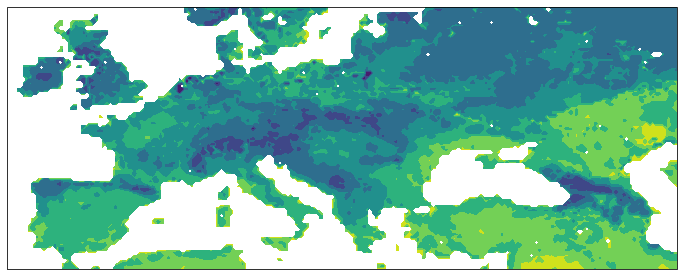

In [6]:
ax.contourf(sm.lon, sm.lat, sm_timestep[0], transform=ccrs.PlateCarree(), cmap="viridis_r")
plt.show()

## Add title, gridlines and axis labels
This looks good! Let's try again, but this time we add some details to the plot.

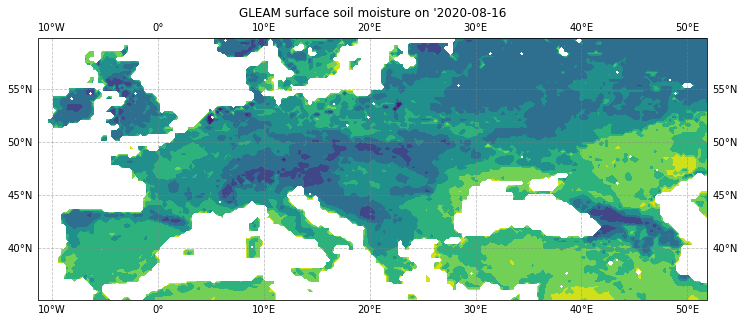

In [7]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(projection=ccrs.PlateCarree())
ax.contourf(sm.lon, sm.lat, sm_timestep[0], transform=ccrs.PlateCarree(), cmap="viridis_r")
ax.set_title("GLEAM surface soil moisture on '2020-08-16")
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, color="gray", alpha=0.5, linestyle="--")
plt.show()

## Make the map interpretable by adding a colorbar
The map looks good so far, but other people have no idea how to intpret the colors. In a next step we are going to
add a colorbar and get rid of some of the axis labels.
By assigning the contourf-plot and the gridlines to new variables, we can access the objects and interact with them directly.

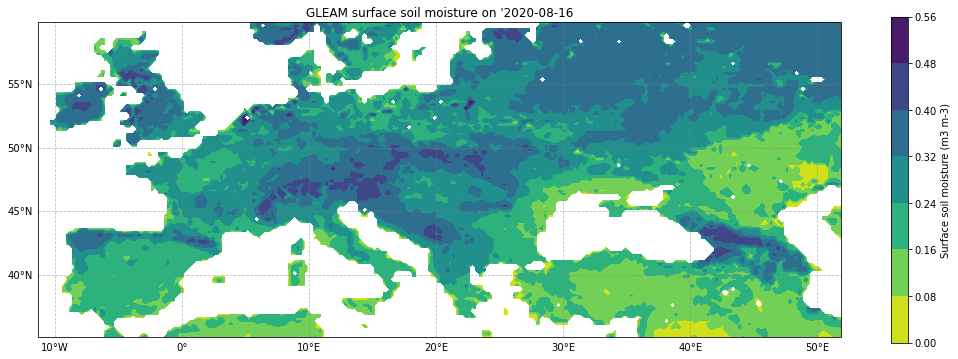

In [8]:
fig = plt.figure(figsize=(18,12))
ax = fig.add_subplot(projection=ccrs.PlateCarree())

map = ax.contourf(sm.lon, sm.lat, sm_timestep[0], transform=ccrs.PlateCarree(), cmap="viridis_r")

cbar = fig.colorbar(map, ax=ax, shrink=0.5)
cbar.set_label("Surface soil moisture (m3 m-3)")
ax.set_title("GLEAM surface soil moisture on '2020-08-16")

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, color="gray", alpha=0.5, linestyle="--")
gl.top_labels = False
gl.right_labels = False
plt.show()

## Make your map look fancy!
This should be sufficient. To see what else cartopy offers, let's add some decoration.

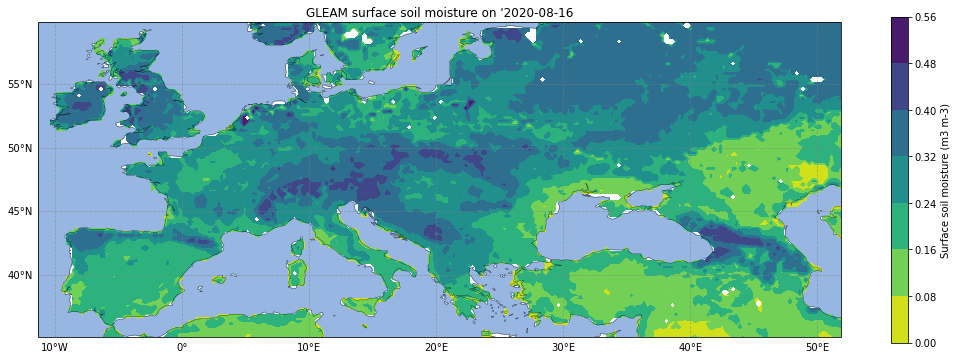

In [9]:
fig = plt.figure(figsize=(18,12))
ax = fig.add_subplot(projection=ccrs.PlateCarree())

map = ax.contourf(sm.lon, sm.lat, sm_timestep[0], transform=ccrs.PlateCarree(), cmap="viridis_r")

cbar = fig.colorbar(map, ax=ax, shrink=0.5)
cbar.set_label("Surface soil moisture (m3 m-3)")
ax.set_title("GLEAM surface soil moisture on '2020-08-16")

ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE, lw=0.3)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, color="gray", alpha=0.5, linestyle="--")
gl.top_labels = False
gl.right_labels = False
plt.show()
